# LAB_1

###  1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;

### 2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;

### 3. Plot precision-recall and ROC curves for your models.

### 4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import(
    precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_curve, roc_auc_score
)

In [2]:
def plot_metrics(name, res_test, res_pred, proba):
    print(name)
    print("precision = {p:.3f}; recall = {r:.3f}; accuracy = {a:.3f}; F1-score = {f:.3f}; log-loss = {ll:.3f}".format(
        p = precision_score(res_test, res_pred), r = recall_score(res_test, res_pred),
        a = accuracy_score(res_test, res_pred), f = f1_score(res_test, res_pred),
        ll = log_loss(res_test, res_pred)))

    fig, (ax_pr, ax_roc) = plt.subplots(1, 2, figsize=(15, 5))

    precision, recall, threshold = precision_recall_curve(res_test, proba)
    fpr, tpr, thr = roc_curve(res_test, proba)

    ax_pr.plot(threshold, precision[:-1], label="precision")
    ax_pr.plot(threshold, recall[:-1], label="recall")
    ax_pr.set_xlabel("threshold")
    ax_pr.set_title("precision-recall curve")
    ax_pr.legend()
    ax_pr.grid()

    plt.plot(fpr, tpr, label=name)
    ax_roc.set_xlabel("false positive rate")
    ax_roc.set_ylabel("true positive rate")
    ax_roc.set_title("ROC curve")
    ax_roc.legend(loc=4)
    ax_roc.grid()

In [3]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
bioresponce.shape

(3751, 1777)

In [5]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [6]:
X = bioresponce.loc[:, "D1":"D1776"]
Y = bioresponce["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

## Small decision tree

Small decision tree
precision = 0.796; recall = 0.804; accuracy = 0.778; F1-score = 0.800; log-loss = 7.669


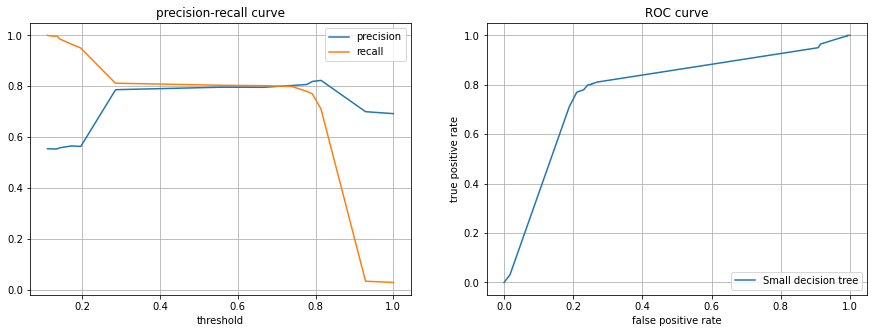

In [7]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 1)
tree = tree.fit(X_train, y_train)
plot_metrics(
    "Small decision tree", y_test,
    tree.predict(X_test),
    tree.predict_proba(X_test)[:, 1]
)

## Deep decision tree

Deep decision tree
precision = 0.762; recall = 0.743; accuracy = 0.730; F1-score = 0.752; log-loss = 9.325


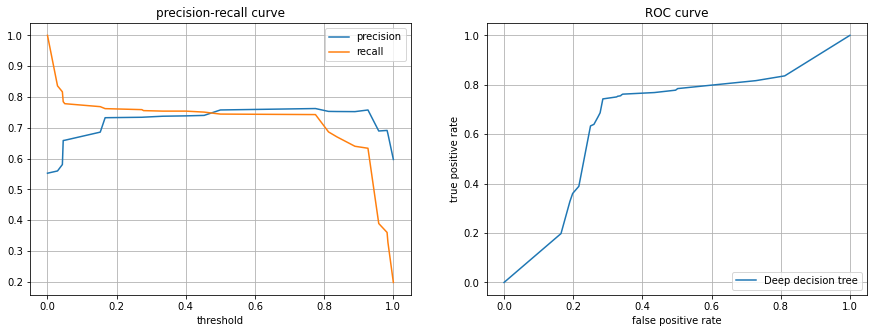

In [8]:
tree = DecisionTreeClassifier(max_depth = 15, random_state = 1)
tree = tree.fit(X_train, y_train)
plot_metrics(
    "Deep decision tree", y_test,
    tree.predict(X_test),
    tree.predict_proba(X_test)[:, 1]
)

## Random forest on a small trees

Random forest on small trees
precision = 0.790; recall = 0.767; accuracy = 0.758; F1-score = 0.778; log-loss = 8.343


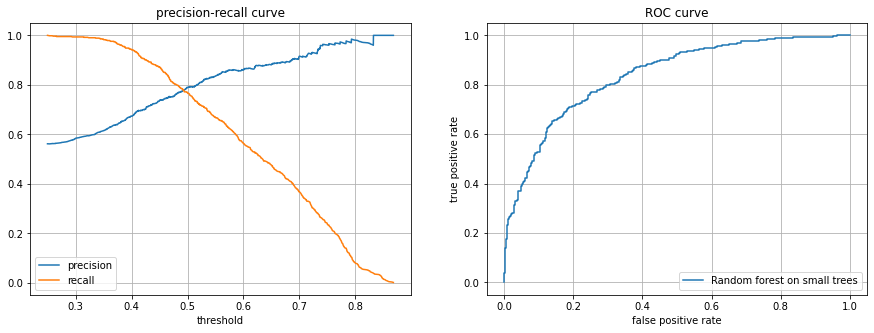

In [9]:
forest = RandomForestClassifier(max_depth = 5, random_state = 1)
forest = forest.fit(X_train, y_train)
plot_metrics(
    "Random forest on small trees", y_test,
    forest.predict(X_test),
    forest.predict_proba(X_test)[:, 1]
)

## Random forest on a deep trees

Random forest on deep trees
precision = 0.818; recall = 0.801; accuracy = 0.791; F1-score = 0.809; log-loss = 7.208


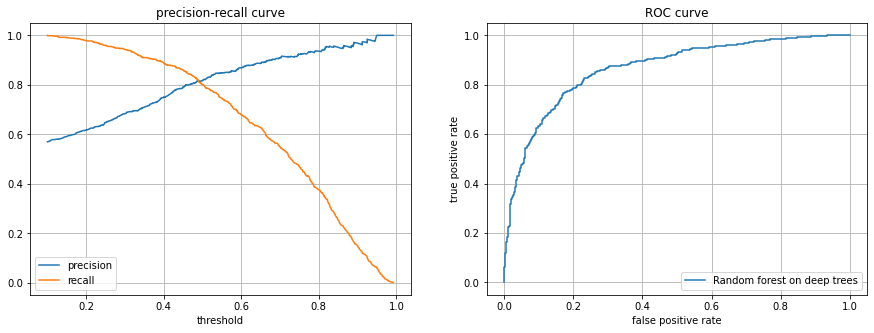

In [10]:
forest = RandomForestClassifier(max_depth = 15, random_state = 1)
forest = forest.fit(X_train, y_train)
plot_metrics(
    "Random forest on deep trees", y_test,
    forest.predict(X_test),
    forest.predict_proba(X_test)[:, 1]
)

## A classifier that avoids False Negative

Avoid FN
precision = 0.656; recall = 0.937; accuracy = 0.694; F1-score = 0.772; log-loss = 10.583


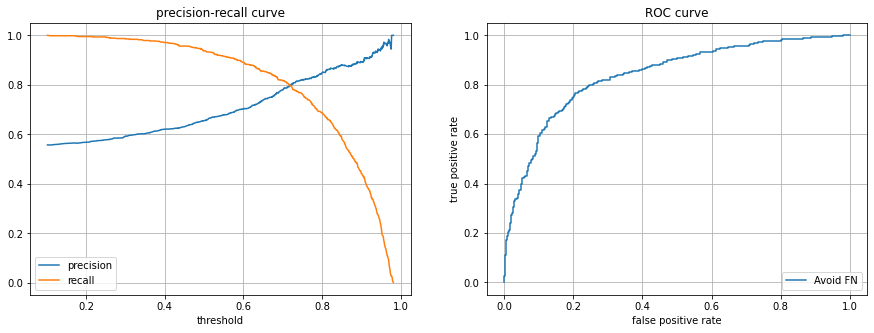

In [11]:
# The "class_weight" attribute has been added, which balances the class weights
# As a result, recall reached its maximum
forest = RandomForestClassifier(max_depth = 15, class_weight={0: 1, 1: 8}, random_state = 1)
forest = forest.fit(X_train, y_train)
plot_metrics(
    "Avoid FN", y_test,
    forest.predict(X_test), forest.predict_proba(X_test)[:, 1]
)